In [23]:
# Copyright (c) 2023 Orange

# Permission is hereby granted, free of charge, to any person obtaining a copy of this software
# and associated documentation files (the "Software"), to deal in the Software without restriction,
# including without limitation the rights to use, copy, modify, merge, publish, distribute,
# sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is
# furnished to do so, subject to the following conditions:

# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING
# BUT NOT LIMITEDTOTHE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND
# NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM,
# DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
# OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
#
# Software Name : knowledge-graph-dst
# Version: 1.0.0
# SPDX-FileCopyrightText: Copyright (c) 2023 Orange
# SPDX-License-Identifier: MIT
# This software is distributed under the MIT,
# the text of which is available at https://opensource.org/licenses/MIT
# or see the "LICENSE" file for more details.
# Author: H. Andres Gonzalez
#!pip install gensim nltk plotly pandas ipywidgets jupyter-dash |  kaleido scikit-learn matplotlib WITH ITS U
#!pip install boto3==1.26.124
!jupyter labextension list

JupyterLab v4.0.2
/home/yddb9991/Documents/base-flant5-dst/data_analysis/viz_snake/share/jupyter/labextensions
        jupyterlab_pygments v0.2.2 enabled  X (python, jupyterlab_pygments)
        jupyterlab-plotly v5.15.0 enabled  X
        @jupyter-widgets/jupyterlab-manager v5.0.8 enabled OK (python, jupyterlab_widgets)


   The following extensions are outdated:
        jupyterlab_pygments
        jupyterlab-plotly
        
   Consider running "jupyter labextension update --all" to check for updates.

Other labextensions (built into JupyterLab)
   app dir: /home/yddb9991/Documents/base-flant5-dst/data_analysis/viz_snake/share/jupyter/lab
        @plotly/dash-jupyterlab v0.4.3 enabled  X
        jupyterlab-dash v0.4.2 enabled  X

   The following extensions are outdated:
        @plotly/dash-jupyterlab
        jupyterlab-dash
        
   Consider running "jupyter labextension update --all" to check for updates.




In [38]:
from datasets import load_dataset, concatenate_datasets
import pandas as pd
import nltk
import numpy as np
import os
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from scipy import stats
from sklearn.decomposition import PCA
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim import corpora, models
from scipy.stats import norm
from fuzzywuzzy import fuzz

# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

/home/yddb9991/Documents/base-flant5-dst/data_analysis/viz_snake/lib/python3.10/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')
[nltk_data] Downloading package punkt to /home/yddb9991/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/yddb9991/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/yddb9991/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Light fine tuning

In [2]:
prefix = {
    "epoch_0": {
        "meteor": 0.0,
        "gleu": 0.0,
        "jga": 0.0,
        "fga_exact_recall": 0.0,
        "fuzzy_jga": 0.0,
        "precision": 0.0,
        "recall": 0.0,
        "f1": 0,
        "train_loss": 6.506918460259547,
        "val_loss": 3.1530328996396624
    },
    "best_epoch": {
        "meteor": 44.913,
        "gleu": 37.362,
        "jga": 0.0,
        "fga_exact_recall": 0.0,
        "fuzzy_jga": 3.5090000000000003,
        "precision": 51.239000000000004,
        "recall": 37.202,
        "f1": 43.106,
        "train_loss": 0.25534193318537385,
        "val_loss": 0.4464522959349035,
        "epoch": 9
    },
    "epoch_1": {
        "meteor": 15.667,
        "gleu": 13.447000000000001,
        "jga": 0.0,
        "fga_exact_recall": 0.0,
        "fuzzy_jga": 3.5090000000000003,
        "precision": 42.836,
        "recall": 10.237,
        "f1": 16.524,
        "train_loss": 1.061390047482203,
        "val_loss": 1.2632888748560318
    },
    "epoch_2": {
        "meteor": 17.998,
        "gleu": 15.808,
        "jga": 0.0,
        "fga_exact_recall": 0.0,
        "fuzzy_jga": 3.5090000000000003,
        "precision": 52.573,
        "recall": 13.259000000000002,
        "f1": 21.177,
        "train_loss": 0.5868616575091028,
        "val_loss": 0.8350141304827149
    },
    "epoch_3": {
        "meteor": 32.432,
        "gleu": 27.644999999999996,
        "jga": 0.0,
        "fga_exact_recall": 0.0,
        "fuzzy_jga": 0.0,
        "precision": 35.949,
        "recall": 19.549,
        "f1": 25.325999999999997,
        "train_loss": 0.4291558054778,
        "val_loss": 0.6797474619042594
    },
    "epoch_4": {
        "meteor": 35.473,
        "gleu": 29.851,
        "jga": 0.0,
        "fga_exact_recall": 0.0,
        "fuzzy_jga": 0.0,
        "precision": 37.785000000000004,
        "recall": 23.598,
        "f1": 29.052,
        "train_loss": 0.36815063319202923,
        "val_loss": 0.6222861755837321
    },
    "epoch_5": {
        "meteor": 37.579,
        "gleu": 30.953000000000003,
        "jga": 0.0,
        "fga_exact_recall": 1.754,
        "fuzzy_jga": 0.0,
        "precision": 42.563,
        "recall": 26.817,
        "f1": 32.903,
        "train_loss": 0.33820511187858754,
        "val_loss": 0.563624158814752
    },
    "epoch_6": {
        "meteor": 38.727000000000004,
        "gleu": 31.009999999999998,
        "jga": 0.0,
        "fga_exact_recall": 1.754,
        "fuzzy_jga": 1.754,
        "precision": 49.799,
        "recall": 31.637999999999998,
        "f1": 38.694,
        "train_loss": 0.30911921613594867,
        "val_loss": 0.4981956273059468
    },
    "epoch_7": {
        "meteor": 42.039,
        "gleu": 35.085,
        "jga": 0.0,
        "fga_exact_recall": 1.754,
        "fuzzy_jga": 1.754,
        "precision": 48.786,
        "recall": 33.832,
        "f1": 39.956,
        "train_loss": 0.2813016702780538,
        "val_loss": 0.4698585751472209
    },
    "epoch_8": {
        "meteor": 42.57,
        "gleu": 35.847,
        "jga": 0.0,
        "fga_exact_recall": 0.0,
        "fuzzy_jga": 1.754,
        "precision": 50.651999999999994,
        "recall": 35.361,
        "f1": 41.647,
        "train_loss": 0.264809560134243,
        "val_loss": 0.45567439980943064
    },
    "epoch_9": {
        "meteor": 44.913,
        "gleu": 37.362,
        "jga": 0.0,
        "fga_exact_recall": 0.0,
        "fuzzy_jga": 3.5090000000000003,
        "precision": 51.239000000000004,
        "recall": 37.202,
        "f1": 43.106,
        "train_loss": 0.25534193318537385,
        "val_loss": 0.4464522959349035
    }
}

In [3]:
ia_3 = {
    "epoch_0": {
        "meteor": 0.0,
        "gleu": 0.0,
        "jga": 0.0,
        "fga_exact_recall": 0.0,
        "fuzzy_jga": 0.0,
        "precision": 0.0,
        "recall": 0.0,
        "f1": 0,
        "train_loss": 4.020210607615867,
        "val_loss": 1.9660616025641764
    },
    "best_epoch": {
        "meteor": 62.013,
        "gleu": 60.205,
        "jga": 0.0,
        "fga_exact_recall": 10.526,
        "fuzzy_jga": 1.754,
        "precision": 60.756,
        "recall": 68.336,
        "f1": 64.324,
        "train_loss": 0.19995828400526502,
        "val_loss": 0.3528790886344662,
        "epoch": 9
    },
    "epoch_1": {
        "meteor": 31.906000000000002,
        "gleu": 26.613,
        "jga": 0.0,
        "fga_exact_recall": 0.0,
        "fuzzy_jga": 3.5090000000000003,
        "precision": 52.124,
        "recall": 24.295,
        "f1": 33.141999999999996,
        "train_loss": 0.7134332227589099,
        "val_loss": 0.6320769419555169
    },
    "epoch_2": {
        "meteor": 42.853,
        "gleu": 37.974999999999994,
        "jga": 0.0,
        "fga_exact_recall": 3.5090000000000003,
        "fuzzy_jga": 1.754,
        "precision": 52.132999999999996,
        "recall": 39.494,
        "f1": 44.942,
        "train_loss": 0.3148726013254943,
        "val_loss": 0.4586099105506067
    },
    "epoch_3": {
        "meteor": 47.449999999999996,
        "gleu": 44.233,
        "jga": 0.0,
        "fga_exact_recall": 3.5090000000000003,
        "fuzzy_jga": 1.754,
        "precision": 55.562999999999995,
        "recall": 46.733000000000004,
        "f1": 50.766999999999996,
        "train_loss": 0.25412752668455546,
        "val_loss": 0.4218346761316245
    },
    "epoch_4": {
        "meteor": 52.876,
        "gleu": 50.483,
        "jga": 0.0,
        "fga_exact_recall": 5.263,
        "fuzzy_jga": 1.754,
        "precision": 57.243,
        "recall": 52.797000000000004,
        "f1": 54.93,
        "train_loss": 0.23371049244051145,
        "val_loss": 0.400166653142724
    },
    "epoch_5": {
        "meteor": 53.931,
        "gleu": 49.911,
        "jga": 0.0,
        "fga_exact_recall": 3.5090000000000003,
        "fuzzy_jga": 1.754,
        "precision": 56.996,
        "recall": 58.595,
        "f1": 57.785,
        "train_loss": 0.2220637631281023,
        "val_loss": 0.38444456907521074
    },
    "epoch_6": {
        "meteor": 59.24700000000001,
        "gleu": 55.679,
        "jga": 1.754,
        "fga_exact_recall": 8.772,
        "fuzzy_jga": 3.5090000000000003,
        "precision": 58.501999999999995,
        "recall": 63.068999999999996,
        "f1": 60.699999999999996,
        "train_loss": 0.21391656688098704,
        "val_loss": 0.3732100403758298
    },
    "epoch_7": {
        "meteor": 61.85699999999999,
        "gleu": 58.461,
        "jga": 1.754,
        "fga_exact_recall": 8.772,
        "fuzzy_jga": 3.5090000000000003,
        "precision": 59.480999999999995,
        "recall": 65.414,
        "f1": 62.307,
        "train_loss": 0.20806436332942455,
        "val_loss": 0.3643574669349326
    },
    "epoch_8": {
        "meteor": 62.102999999999994,
        "gleu": 60.51,
        "jga": 1.754,
        "fga_exact_recall": 8.772,
        "fuzzy_jga": 1.754,
        "precision": 60.146,
        "recall": 66.484,
        "f1": 63.157,
        "train_loss": 0.20347074667420964,
        "val_loss": 0.35797758043107053
    },
    "epoch_9": {
        "meteor": 62.013,
        "gleu": 60.205,
        "jga": 0.0,
        "fga_exact_recall": 10.526,
        "fuzzy_jga": 1.754,
        "precision": 60.756,
        "recall": 68.336,
        "f1": 64.324,
        "train_loss": 0.19995828400526502,
        "val_loss": 0.3528790886344662
    }
}

In [4]:
lora_10 = {
    "epoch_0": {
        "meteor": 41.509,
        "gleu": 36.903000000000006,
        "jga": 0.0,
        "fga_exact_recall": 1.754,
        "fuzzy_jga": 0.0,
        "precision": 49.114999999999995,
        "recall": 35.898,
        "f1": 41.479,
        "train_loss": 1.7317150637940024,
        "val_loss": 0.4819892887647721
    },
    "best_epoch": {
        "meteor": 61.085,
        "gleu": 44.998,
        "jga": 0.0,
        "fga_exact_recall": 47.368,
        "fuzzy_jga": 0.0,
        "precision": 48.423,
        "recall": 93.836,
        "f1": 63.881,
        "train_loss": 0.14759324237915966,
        "val_loss": 0.2695948163827948,
        "epoch": 9
    },
    "epoch_1": {
        "meteor": 59.925,
        "gleu": 52.757,
        "jga": 0.0,
        "fga_exact_recall": 12.281,
        "fuzzy_jga": 0.0,
        "precision": 56.579,
        "recall": 65.58,
        "f1": 60.748000000000005,
        "train_loss": 0.23741555782500942,
        "val_loss": 0.3547893536400294
    },
    "epoch_2": {
        "meteor": 63.32,
        "gleu": 54.732,
        "jga": 0.0,
        "fga_exact_recall": 19.298000000000002,
        "fuzzy_jga": 0.0,
        "precision": 55.111,
        "recall": 78.73,
        "f1": 64.836,
        "train_loss": 0.19190770361073192,
        "val_loss": 0.3198873039855356
    },
    "epoch_3": {
        "meteor": 63.9,
        "gleu": 52.502,
        "jga": 0.0,
        "fga_exact_recall": 38.596000000000004,
        "fuzzy_jga": 0.0,
        "precision": 52.288000000000004,
        "recall": 87.587,
        "f1": 65.484,
        "train_loss": 0.17457904165853425,
        "val_loss": 0.3041530769636074
    },
    "epoch_4": {
        "meteor": 64.09700000000001,
        "gleu": 52.669999999999995,
        "jga": 0.0,
        "fga_exact_recall": 35.088,
        "fuzzy_jga": 0.0,
        "precision": 52.059999999999995,
        "recall": 89.361,
        "f1": 65.792,
        "train_loss": 0.16528127039308124,
        "val_loss": 0.2910025130833035
    },
    "epoch_5": {
        "meteor": 64.00200000000001,
        "gleu": 48.863,
        "jga": 0.0,
        "fga_exact_recall": 33.333,
        "fuzzy_jga": 0.0,
        "precision": 47.522999999999996,
        "recall": 89.737,
        "f1": 62.138000000000005,
        "train_loss": 0.1592288609948458,
        "val_loss": 0.2839084834928713
    },
    "epoch_6": {
        "meteor": 63.361000000000004,
        "gleu": 50.434,
        "jga": 0.0,
        "fga_exact_recall": 40.351,
        "fuzzy_jga": 0.0,
        "precision": 48.959,
        "recall": 91.457,
        "f1": 63.776999999999994,
        "train_loss": 0.15506377265805296,
        "val_loss": 0.2777874455942654
    },
    "epoch_7": {
        "meteor": 63.72,
        "gleu": 48.055,
        "jga": 0.0,
        "fga_exact_recall": 43.86,
        "fuzzy_jga": 0.0,
        "precision": 51.212,
        "recall": 92.095,
        "f1": 65.822,
        "train_loss": 0.15210553685719766,
        "val_loss": 0.2743922276203653
    },
    "epoch_8": {
        "meteor": 63.612,
        "gleu": 46.837,
        "jga": 0.0,
        "fga_exact_recall": 35.088,
        "fuzzy_jga": 0.0,
        "precision": 53.075,
        "recall": 92.082,
        "f1": 67.338,
        "train_loss": 0.1495998353548371,
        "val_loss": 0.2716798387992809
    },
    "epoch_9": {
        "meteor": 61.085,
        "gleu": 44.998,
        "jga": 0.0,
        "fga_exact_recall": 47.368,
        "fuzzy_jga": 0.0,
        "precision": 48.423,
        "recall": 93.836,
        "f1": 63.881,
        "train_loss": 0.14759324237915966,
        "val_loss": 0.2695948163827948
    }
}

In [5]:
lora_20 = {
    "epoch_0": {
        "meteor": 26.611,
        "gleu": 15.634999999999998,
        "jga": 0.0,
        "fga_exact_recall": 0.0,
        "fuzzy_jga": 0.0,
        "precision": 0.0,
        "recall": 0.0,
        "f1": 0,
        "train_loss": 2.58381059548603,
        "val_loss": 2.7215648198451925
    },
    "best_epoch": {
        "meteor": 42.78,
        "gleu": 31.521,
        "jga": 0.0,
        "fga_exact_recall": 0.0,
        "fuzzy_jga": 7.018000000000001,
        "precision": 61.449,
        "recall": 27.819,
        "f1": 38.299,
        "train_loss": 0.13751314848620005,
        "val_loss": 0.19511677671974462,
        "epoch": 9
    },
    "epoch_1": {
        "meteor": 9.036,
        "gleu": 3.019,
        "jga": 0.0,
        "fga_exact_recall": 0.0,
        "fuzzy_jga": 0.0,
        "precision": 0.0,
        "recall": 0.0,
        "f1": 0,
        "train_loss": 1.0370114552912115,
        "val_loss": 0.9479764244612422
    },
    "epoch_2": {
        "meteor": 1.576,
        "gleu": 0.8410000000000001,
        "jga": 0.0,
        "fga_exact_recall": 0.0,
        "fuzzy_jga": 0.0,
        "precision": 0.0,
        "recall": 0.0,
        "f1": 0,
        "train_loss": 0.47461440187773635,
        "val_loss": 0.5573042960116831
    },
    "epoch_3": {
        "meteor": 4.454000000000001,
        "gleu": 4.322,
        "jga": 0.0,
        "fga_exact_recall": 0.0,
        "fuzzy_jga": 0.0,
        "precision": 0.0,
        "recall": 0.0,
        "f1": 0,
        "train_loss": 0.3062199997802514,
        "val_loss": 0.4089332070427271
    },
    "epoch_4": {
        "meteor": 1.006,
        "gleu": 0.5780000000000001,
        "jga": 0.0,
        "fga_exact_recall": 0.0,
        "fuzzy_jga": 0.0,
        "precision": 0.0,
        "recall": 0.0,
        "f1": 0,
        "train_loss": 0.23797311351954975,
        "val_loss": 0.34548892447326623
    },
    "epoch_5": {
        "meteor": 6.9639999999999995,
        "gleu": 5.1290000000000004,
        "jga": 0.0,
        "fga_exact_recall": 0.0,
        "fuzzy_jga": 7.018000000000001,
        "precision": 19.591,
        "recall": 1.951,
        "f1": 3.549,
        "train_loss": 0.20315637071332202,
        "val_loss": 0.2893548841382134
    },
    "epoch_6": {
        "meteor": 21.004,
        "gleu": 16.183,
        "jga": 0.0,
        "fga_exact_recall": 0.0,
        "fuzzy_jga": 7.018000000000001,
        "precision": 41.617,
        "recall": 8.302,
        "f1": 13.843,
        "train_loss": 0.17817345815765373,
        "val_loss": 0.2513676451332637
    },
    "epoch_7": {
        "meteor": 35.573,
        "gleu": 24.665,
        "jga": 0.0,
        "fga_exact_recall": 0.0,
        "fuzzy_jga": 7.018000000000001,
        "precision": 50.771,
        "recall": 18.506,
        "f1": 27.125,
        "train_loss": 0.15982252627569743,
        "val_loss": 0.22741565443529335
    },
    "epoch_8": {
        "meteor": 40.184,
        "gleu": 28.529,
        "jga": 0.0,
        "fga_exact_recall": 0.0,
        "fuzzy_jga": 1.754,
        "precision": 56.913000000000004,
        "recall": 24.57,
        "f1": 34.322,
        "train_loss": 0.1469626990057772,
        "val_loss": 0.20932010265599074
    },
    "epoch_9": {
        "meteor": 42.78,
        "gleu": 31.521,
        "jga": 0.0,
        "fga_exact_recall": 0.0,
        "fuzzy_jga": 7.018000000000001,
        "precision": 61.449,
        "recall": 27.819,
        "f1": 38.299,
        "train_loss": 0.13751314848620005,
        "val_loss": 0.19511677671974462
    }
}

In [6]:
light_finetuning_logs = {"prefix": prefix, "ia_3": ia_3, "lora_10": lora_10, "lora_20": lora_20}

In [7]:

def gen_metrics_for_plots(train_logs: dict, method_name: str, epoch_n: int):
    meteor_scores = []
    gleu_scores = []
    f1_scores = []
    fuzzy_jga_scores = []
    loss = []
    method = train_logs[method_name]
    for n in range(epoch_n):
        meteor_scores.append(method[f'epoch_{n}']['meteor'])
        gleu_scores.append(method[f'epoch_{n}']['gleu'])
        f1_scores.append(method[f'epoch_{n}']['f1'])
        loss.append(method[f'epoch_{n}']['val_loss'])
        fuzzy_jga_scores.append(method[f'epoch_{n}']['fuzzy_jga'])
    return {method_name: {'meteor': meteor_scores, 'gleu': gleu_scores, 'f1': f1_scores, 'jga': fuzzy_jga_scores, 'loss': loss}}

In [8]:
light_finetuning_logs.keys()

dict_keys(['prefix', 'ia_3', 'lora_10', 'lora_20'])

In [9]:
gen_metrics_for_plots(light_finetuning_logs, "prefix", 10)
light_methods = {method: list(gen_metrics_for_plots(light_finetuning_logs, method, 10).values())[0] for method in light_finetuning_logs.keys()}
light_methods['lora'] = {'meteor': light_methods['lora_10']['meteor'] + light_methods['lora_20']['meteor'],
                         'gleu': light_methods['lora_10']['gleu'] + light_methods['lora_20']['gleu'],
                         'jga': light_methods['lora_10']['jga'] + light_methods['lora_20']['jga'],
                         'f1': light_methods['lora_10']['f1'] + light_methods['lora_20']['f1'],
                         'loss': light_methods['lora_10']['loss'] + light_methods['lora_20']['loss']}
light_methods['lora'] = light_methods['lora_10']  # with 20 it was not loading the checkpoints, ignore
light_methods.pop('lora_10')
light_methods.pop('lora_20')
print(light_methods.keys())

dict_keys(['prefix', 'ia_3', 'lora'])


In [10]:
f1_prefix = light_methods['prefix']['f1']
f1_ia_3 = light_methods['ia_3']['f1']
f1_lora = light_methods['lora']['f1']

meteor_prefix = light_methods['prefix']['meteor']
meteor_ia_3 = light_methods['ia_3']['meteor']
meteor_lora = light_methods['lora']['meteor']

gleu_prefix = light_methods['prefix']['gleu']
gleu_ia_3 = light_methods['ia_3']['gleu']
gleu_lora = light_methods['lora']['gleu']

jga_prefix = light_methods['prefix']['jga']
jga_ia_3 = light_methods['ia_3']['jga']
jga_lora = light_methods['lora']['jga']

loss_prefix = light_methods['prefix']['loss']
loss_ia_3 = light_methods['ia_3']['loss']
loss_lora = light_methods['lora']['loss']

In [11]:
loss_lora

[0.4819892887647721,
 0.3547893536400294,
 0.3198873039855356,
 0.3041530769636074,
 0.2910025130833035,
 0.2839084834928713,
 0.2777874455942654,
 0.2743922276203653,
 0.2716798387992809,
 0.2695948163827948]

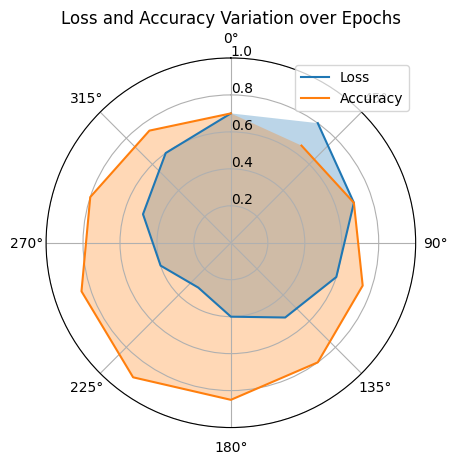

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data: Number of epochs, loss, and accuracy at each epoch
epochs = np.arange(1, 11)  # Assuming 10 epochs for this example
loss = np.array([0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.4, 0.5, 0.6, 0.7])
accuracy = np.array([0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.85, 0.8, 0.75, 0.7])

# Create a circular plot using polar coordinates
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

# Convert epochs values from linear to radians
theta = np.deg2rad((epochs / max(epochs)) * 360)

# Plot the loss values on the circular plot
ax.plot(theta, loss, label='Loss')
ax.fill(theta, loss, alpha=0.3)  # Fill the area under the loss curve

# Plot the accuracy values on the circular plot
ax.plot(theta, accuracy, label='Accuracy')
ax.fill(theta, accuracy, alpha=0.3)  # Fill the area under the accuracy curve

# Customize the plot appearance
ax.set_rlabel_position(0)  # Move radial labels outside the circle
ax.set_theta_offset(np.pi / 2)  # Set the starting angle to the right (3 o'clock)
ax.set_theta_direction(-1)  # Reverse the direction of the angles (clockwise)
ax.set_rlim(0, 1)  # Set the radial axis limits for the loss and accuracy values

# Add gridlines and a legend
ax.grid(True)
ax.legend(loc='upper right')

# Add a title
plt.title('Loss and Accuracy Variation over Epochs')

# Show the plot
plt.show()



In [63]:
repeated_epochs = [item for item in [3, 6, 9] for _ in range(3)]
method_names = ['ia_3', 'prefix', 'lora']

viz_meteor = [light_methods[m]['meteor'][e] for e, m in zip(repeated_epochs, method_names * 3)]
viz_f1 = [light_methods[m]['f1'][e] for e, m in zip(repeated_epochs, method_names * 3)]
viz_loss = [light_methods[m]['loss'][e] for e, m in zip(repeated_epochs, method_names * 3)]

In [78]:
data = {
    'Epochs': repeated_epochs,
    'Methods': ['IA3', 'Prefix', 'LoRA'] * 3,
    'Loss': viz_loss,
    'Meteor': viz_meteor,
    'F1': viz_f1
}

df = pd.DataFrame(data)



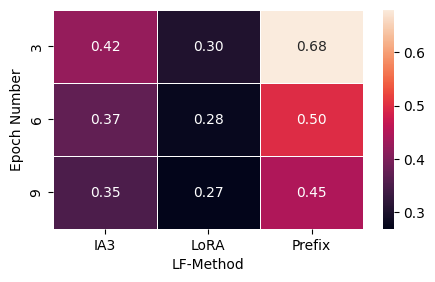

In [99]:
# Calculate average loss value for each model at each epoch
pivot_df = df.pivot_table(index='Epochs', columns='Methods', values='Loss', aggfunc=np.median)

# Create the heatmap using seaborn
fig = plt.figure(figsize=(5, 3))
ax = sns.heatmap(pivot_df, annot=True, fmt='.2f', linewidths=0.5)
ax.set(ylabel='Epoch Number', xlabel='LF-Method')
#https://docs.kanaries.net/tutorials/Matplotlib/matplotlib-savefig-cuts-off-labels
plt.subplots_adjust(bottom=0.15)
plt.show()
fig.savefig("Loss_LF")


In [76]:
pivot_df

Methods,IA3,LoRA,Prefix
Epochs,,,
3,0.421835,0.304153,0.679747
6,0.373210,0.277787,0.498196
9,0.352879,0.269595,0.446452


In [90]:
6 / 1.5

4.0

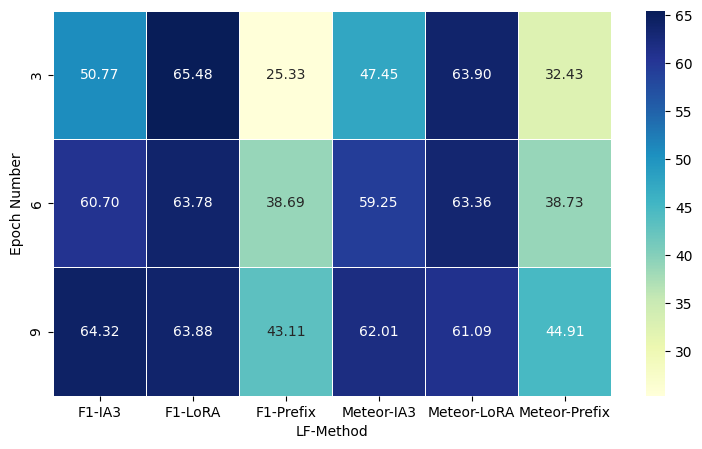

In [96]:
# Calculate average loss value for each model at each epoch
pivot_df = df.pivot_table(index='Epochs', columns='Methods', values=['Meteor', 'F1'], aggfunc=np.median)

# Create the heatmap using seaborn
fig = plt.figure(figsize=(9, 5))
ax = sns.heatmap(pivot_df, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
#plt.title('Median Loss Heatmap over Epochs and Methods')
ax.set(ylabel='Epoch Number', xlabel='LF-Method')

plt.show()
fig.savefig("Metrics_LF")



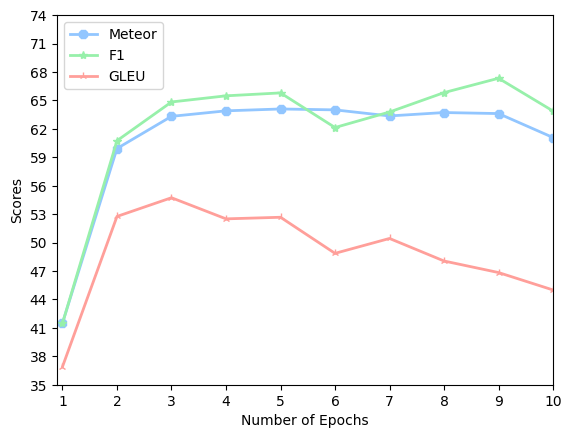

In [96]:
plt.style.use('seaborn-v0_8-pastel')

beam_sizes = np.array(range(1, 11))
method_labels = ['LoRA', 'IA3', 'Prefix']
metric_labels = ["Meteor", "F1", "GLEU"]
markers = ['8', '*', '2']
#exp_array = [loss_lora, loss_ia_3, loss_prefix]
exp_array = [meteor_lora, f1_lora, gleu_lora]
exp_1_vals = [num for values in exp_array for num in values]


y_min =  min(exp_1_vals)
y_max =  max(exp_1_vals)

# plot

 
fig, ax = plt.subplots()

def gen_lines(ax, beam_s, exp_array, labels, markers):
    handles = []
    for exp, l, m in zip(exp_array, labels, markers):        
        lines, = ax.plot(beam_s, exp, label=l, marker=m, linewidth=2.0)
        handles.append(lines)

        # for score in exp:
        #     ax.text(beam_sizes[1] + 0.2, score, f'{score:.2f}', va='center')


    
    return handles

handles = gen_lines(ax, beam_sizes, exp_array, metric_labels, markers)

ax.legend(handles=handles)



ax.set(xlim=(0.9, 5.1), xticks=list(range(1, 11)),
       ylabel='Scores', xlabel='Number of Epochs',# title='Greedy Search vs. Beam Search',
       ylim=(y_min, y_max), yticks=np.arange(35, 75, 3))

plt.show()
fig.savefig("prefix")
#TODO: THEN PLOT LOSS TO SHOW THAT THE MODELS ARE STILL LEARNING, LONGER TO CONVERGE!

# Relevance of Intermediate States

In [166]:
model_folders = ['long_tglobal', 'long_local', 'T5_base', 'T5_large', 'flanT5']
dataset_folder = ['multiwoz', 'dstc2', 'sfx']
experiments = [1, 2, 3]
path = f'/home/yddb9991/Documents/base-flant5-dst/results/stored_outputs/{model_folders[0]}/{dataset_folder[0]}/exp_{experiments[0]}'

In [167]:
df = pd.read_csv(os.path.join(path, 'outputs.csv'))   
preds = [eval(pred) for pred in df['preds'].array]   
labels = [eval(label) for label in df['labels'].array]  
ids = [eval(id) for id in df['ids'].array]   
inputs = [eval(id) for id in df['inputs'].array]   

preds = [all_rdfs for pred in preds for all_rdfs in pred]  
labels = [all_rdfs for label in labels for all_rdfs in label]  
ids = [all_rdfs for i in ids for all_rdfs in i] 
inputs = [all_rdfs for i in inputs for all_rdfs in i] 

preds = [set(p) for p in preds]
labels = [set(l) for l in labels]

data = {"preds": preds, "labels": labels, "ids": ids, "inputs": inputs}  

In [168]:
def wrong_states_rate(data):

    preds = data['preds']
    labels = data['labels']
    ids = data['ids']
    inputs = data['inputs']
    jga = []
    fga = []
    fuzzy_jga = []
    errors = dict()
    for i, (p, l) in enumerate(zip(preds, labels)):
        # flexible_match = l <= p
        # fga.append(1 if flexible_match else 0)
        exact_match = p ^ l
        # jga.append(1 if len(exact_match) == 0 else 0)

        # fuzzy_jga.append(1 if fuzz.partial_ratio(p, l) >= fuzzy_ratio else 0)    
        #if len(exact_match) != 0:
        if fuzz.partial_ratio(p, l) <= 95: 
            hall = p - l
            missed = l - p
            try:
                missed_ratio = round(len(missed)/len(l) * 100, 2)
                hall_ratio = round(len(missed)/len(p) * 100, 2)
            except ZeroDivisionError:
                missed_ratio = 0
                hall_ratio = 0
            errors.setdefault(i, {'hallucinations': hall, 'missed': missed, 'id': ids[i], 'inputs': inputs[i],
                                  'total_labels': len(l), 'total_preds': len(p), 'missed_ratio': missed_ratio,
                                  'hall_ratio': hall_ratio})
    return errors
            
  


In [169]:
compute_dict = wrong_states_rate(data)

In [172]:
# sorted(compute_dict.keys())
# compute_dict[32]
from collections import Counter
missed_triples = [triple for v in compute_dict.values() for triple in v['missed']]
count_missed = Counter(missed_triples)  # max 319
#sum(v for v in count_missed.values() if v == 1)
hall_triples = [triple for v in compute_dict.values() for triple in v['hallucinations']]
count_hall = Counter(hall_triples)  # max 319
# count_hall
# count_missed

In [134]:
actual_missed = sorted(v['missed_ratio'] for v in compute_dict.values() if v['missed_ratio'] != 0)
actual_hall = sorted(v['hall_ratio'] for v in compute_dict.values() if v['hall_ratio'] != 0)
median = round(np.median(actual_missed), 2)
mode = round(stats.mode(actual_missed)[0], 2)
mean = round(np.mean(actual_missed), 2)
print(f'mean {mean}, median {median}, mode {mode} size {len(actual_missed)}')

median = round(np.median(actual_hall), 2)
mode = round(stats.mode(actual_hall)[0], 2)
mean = round(np.mean(actual_hall), 2)
print(f'mean {mean}, median {median}, mode {mode} size {len(actual_hall)}')

mean 10.87, median 8.33, mode 12.5 size 2185
mean 11.7, median 8.7, mode 7.14 size 2185


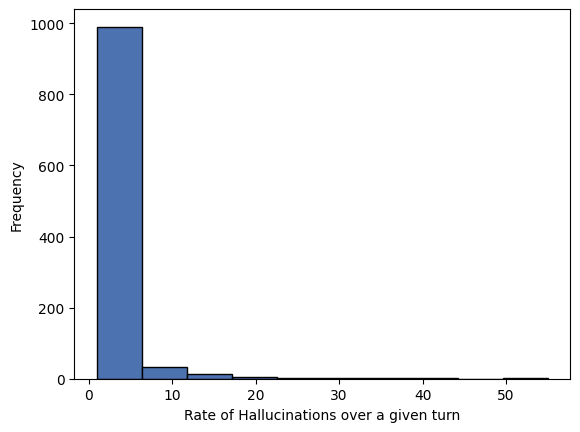

In [141]:

small_missed = list(filter(lambda x: x < 15, actual_missed))
small_hall = list(filter(lambda x: x < 15, actual_hall))
plt.style.use('seaborn-v0_8-deep')
fig, ax = plt.subplots()

ax.hist(count_missed.values(), bins=10, edgecolor='black')  # You can adjust the number of bins as needed
#plt.title('Distribution of Repeated Values')
ax.set(xlabel='Rate of Hallucinations over a given turn',
      ylabel='Frequency')
plt.show()
fig.savefig("Hallucinations Rate")

# Plots for zero-shot

In [29]:
# /home/yddb9991/Documents/base-flant5-dst/results/stored_outputs/long_tglobal/dsct2/exp_1
model_folders = ['long_tglobal', 'long_local', 'T5_base', 'T5_large', 'flanT5']
dataset_folder = ['multiwoz', 'dstc2', 'sfx']
experiments = [1, 2, 3]
path = f'/home/yddb9991/Documents/base-flant5-dst/results/stored_outputs/{model_folders[0]}/{dataset_folder[2]}/exp_{experiments[1]}'

In [30]:
os.listdir(f'/home/yddb9991/Documents/base-flant5-dst/results/stored_outputs/{model_folders[0]}/{dataset_folder[1]}/exp_{experiments[0]}')

['outputs.csv']

In [31]:
df = pd.read_csv(os.path.join(path, 'outputs.csv'))   
preds = [eval(pred) for pred in df['preds'].array]   
labels = [eval(label) for label in df['labels'].array]  
ids = [eval(id) for id in df['ids'].array]   

preds = [all_rdfs for pred in preds for all_rdfs in pred]  
labels = [all_rdfs for label in labels for all_rdfs in label]  
ids = [all_rdfs for i in ids for all_rdfs in i] 

preds = [set(p) for p in preds]
labels = [set(l) for l in labels]

data = {"preds": preds, "labels": labels, "ids": ids}  

In [32]:
def compute_true_false(predictions, references):

    # States in reference that were correctly generated by prediction
    intersections = [
        len(c & r) for c, r in zip(predictions, references)
    ]

    #false positives: They are in prediction but not in reference
    false_pos = [
        len(c - r) for c, r in zip(predictions, references)
    ]

    #false negatives: They are in reference but not in prediction
    false_negs = [
        len(r - c) for r, c in zip(references, predictions)
    ]

    return {'fp': false_pos, 'fn': false_negs,
            'tp': intersections}


In [33]:
compute_dict = compute_true_false(data['preds'], data['labels'])

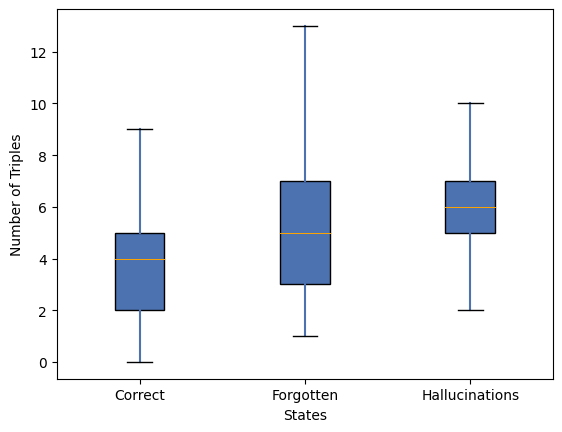

In [34]:

def plot_boxplot(tps, fns, fps):
    data = [tps, fns, fps]
    labels = ['Correct', 'Forgotten', 'Hallucinations']

    # Create the box plot using ax
    plt.style.use('seaborn-v0_8-deep')
    fig, ax = plt.subplots()
    ax.boxplot(data, labels=labels, patch_artist=True,
               showmeans=False, showfliers=False,
               medianprops={"color": "orange", "linewidth": 0.7},
               whiskerprops={"color": "C0", "linewidth": 1.5})

    # Set plot title and axis labels

    ax.set(xlabel='States', ylabel='Number of Triples')#,

    # Show the plot
    plt.show()

# Example usage:
tps = compute_dict['tp']
fns = compute_dict['fn']
fps = compute_dict['fp']

plot_boxplot(tps, fns, fps)

In [35]:
def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value


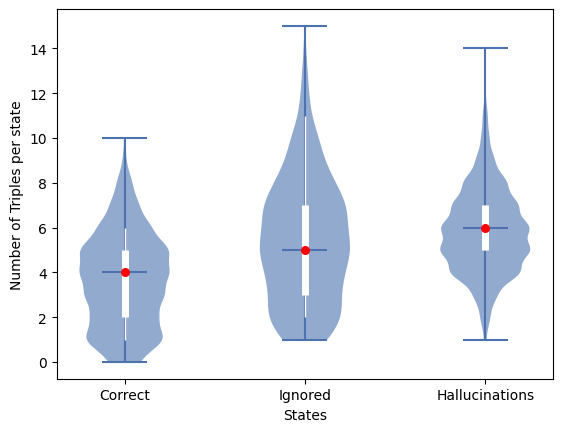

In [36]:
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.violinplot.html#matplotlib.pyplot.violinplot
def plot_violinplot(tps, fns, fps):
    data = [tps, fns, fps]
    labels = ['Correct', 'Ignored', 'Hallucinations']

    # Create the violin plot using ax
    plt.style.use('seaborn-v0_8-deep')
    fig, ax = plt.subplots()
    # (data, labels=labels, patch_artist=True,
    #            showmeans=False, showfliers=False,
    #            medianprops={"color": "orange", "linewidth": 0.7},
    #            whiskerprops={"color": "C0", "linewidth": 1.5})
    violins = ax.violinplot(data, showmedians=True, showmeans=False,
                           showextrema=True)

    # Set properties for the violins
    for pc in violins['bodies']:   
        pc.set(alpha=.6, facecolor='C0')

    # Set properties for the median line
    # med = violins['cmedians']
    # med.set(linewidth=0.7, color='orange')
    
    quartile1, medians, quartile3 = np.percentile(data, [25, 50, 75], axis=1)
    whiskers = np.array([
        adjacent_values(sorted_array, q1, q3)
        for sorted_array, q1, q3 in zip(data, quartile1, quartile3)])
    whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1]
    inds = np.arange(1, len(medians) + 1)
    ax.scatter(inds, medians, marker='o', color='red', s=30, zorder=3)
    ax.vlines(inds, quartile1, quartile3, color='white', linestyle='-', lw=5)
    ax.vlines(inds, whiskers_min, whiskers_max, color='white', linestyle='-', lw=1)
    
    # min = violins['cmins']
    # min.set(linewidth=0.9, color='orange')
    
    # max = violins['cmaxes']
    # max.set(linewidth=0.9, color='orange')
    
    # min = violins['cbars']
    # min.set(linewidth=0.9, color='orange')

    # Set plot title and axis labels
    ax.set(xlabel='States', ylabel='Number of Triples per state',
          xticks=range(1, len(labels) + 1), xticklabels=labels)


    # Show the plot
    plt.show()
    fig.savefig("sfx_violin_exp2")

# Example usage:
tps = compute_dict['tp']
fns = compute_dict['fn']
fps = compute_dict['fp']

plot_violinplot(tps, fns, fps)



In [127]:
df = pd.DataFrame.from_dict(compute_dict)

# fig = go.Figure()
# fig.add_trace(go.Violin(y=indian['Runs'], box_visible=True, line_color='black',meanline_visible=True, fillcolor='lightseagreen', 
#                         opacity=0.6, name='Indian'))
# fig.add_trace(go.Violin(y=overseas['Runs'], box_visible=True, line_color='black',meanline_visible=True, fillcolor='lightseagreen', 
#                         opacity=0.6,name='Overseas'))
# fig.update_layout(yaxis_title="Runs")
# fig.show()

fig = go.Figure()

fig.add_trace(go.Violin(y=df['tp'], box_visible=True, line_color='black',
                               meanline_visible=True, fillcolor='lightseagreen', opacity=0.6,
                               name='Correct'))
fig.add_trace(go.Violin(y=df['fn'], box_visible=True, line_color='black',
                               meanline_visible=True, fillcolor='lightseagreen', opacity=0.6,
                               name='Ignored'))
fig.add_trace(go.Violin(y=df['fp'], box_visible=True, line_color='black',
                               meanline_visible=True, fillcolor='lightseagreen', opacity=0.6,
                               name='Hallucinations'))

#fig.update_layout(yaxis_zeroline=False)
fig.update_traces(box_visible=True, meanline_visible=True)
fig.update_layout(violinmode='group')

fig.show()

# Playground for other plots

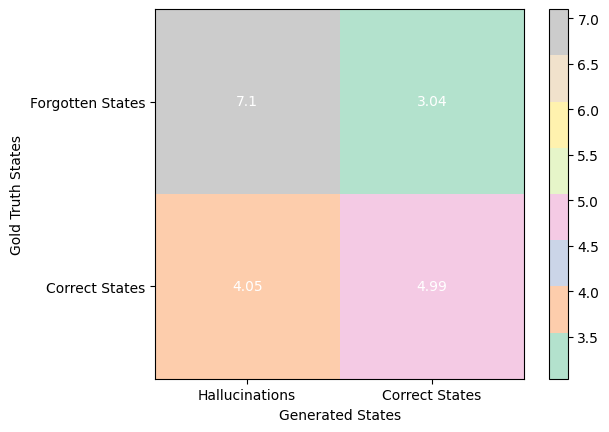

In [82]:
def plot_confusion_matrix(tp, fp, tn, fn):
    confusion_matrix = [[tn, fp], [fn, tp]]

    fig, ax = plt.subplots()
    im = ax.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Pastel2)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=[0, 1], yticks=[0, 1],
           xticklabels=["Hallucinations", "Correct States"], yticklabels=["Forgotten States", "Correct States"],
           xlabel='Generated States', ylabel='Gold Truth States')#,
           #title='Confusion Matrix')

    # Loop over data dimensions and create text annotations.
    for i in range(2):
        for j in range(2):
            ax.text(j, i, str(confusion_matrix[i][j]), ha="center", va="center", color="white")

    plt.show()

# Example usage:
tp = round(sum(compute_dict['tp']) / len(compute_dict['tp']), 2)
fp = round(sum(compute_dict['fp']) / len(compute_dict['fp']), 2)
tn = round(sum(compute_dict['tn']) / len(compute_dict['tn']), 2)
fn = round(sum(compute_dict['fn']) / len(compute_dict['fn']), 2)

plot_confusion_matrix(tp, fp, tn, fn)

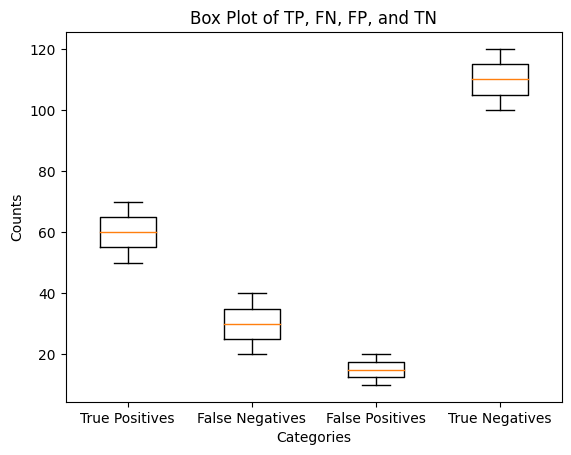

In [74]:
import matplotlib.pyplot as plt

# Example data (replace with your actual data)
tps = [50, 60, 70]
fns = [20, 30, 40]
fps = [10, 15, 20]
tns = [100, 110, 120]

data = [tps, fns, fps, tns]
labels = ['True Positives', 'False Negatives', 'False Positives', 'True Negatives']

# Create the box plot using ax
fig, ax = plt.subplots()
ax.boxplot(data, labels=labels)

# Set plot title and axis labels
ax.set_title('Box Plot of TP, FN, FP, and TN')
ax.set_xlabel('Categories')
ax.set_ylabel('Counts')

# Show the plot
plt.show()


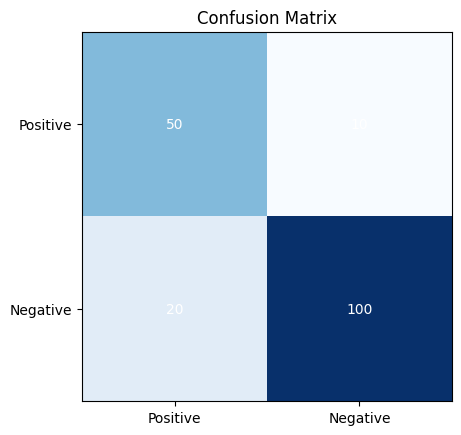

In [63]:
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(tps, fps, tns, fns):
    confusion_matrix = np.array([[tps, fps], [fns, tns]])

    fig, ax = plt.subplots()
    im = ax.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)

    ax.set(xticks=[0, 1], yticks=[0, 1],
           xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'],
           title='Confusion Matrix')

    for i in range(2):
        for j in range(2):
            ax.text(j, i, str(confusion_matrix[i, j]), ha="center", va="center", color="white")

    plt.show()

# Example usage:
tps = 50
fps = 10
tns = 100
fns = 20

plot_confusion_matrix(tps, fps, tns, fns)


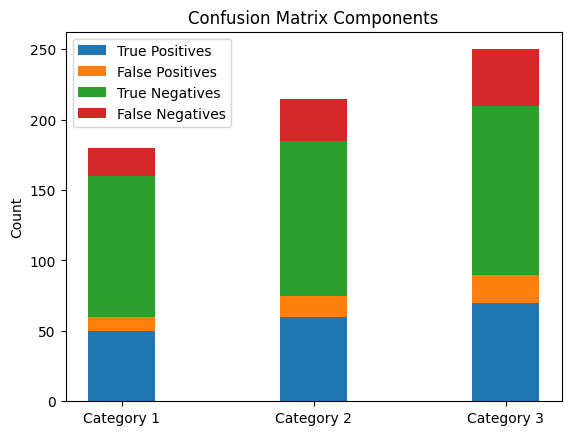

In [62]:
import matplotlib.pyplot as plt

def plot_stacked_bar_chart(tps, fps, tns, fns):
    labels = ['Category 1', 'Category 2', 'Category 3']  # Replace with your category labels

    fig, ax = plt.subplots()
    width = 0.35

    p1 = ax.bar(labels, tps, width, label='True Positives')
    p2 = ax.bar(labels, fps, width, bottom=tps, label='False Positives')
    p3 = ax.bar(labels, tns, width, bottom=[tps[i] + fps[i] for i in range(len(tps))], label='True Negatives')
    p4 = ax.bar(labels, fns, width, bottom=[tps[i] + fps[i] + tns[i] for i in range(len(tps))], label='False Negatives')

    ax.set_ylabel('Count')
    ax.set_title('Confusion Matrix Components')
    ax.legend()

    plt.show()

# Example usage:
tps = [50, 60, 70]
fps = [10, 15, 20]
tns = [100, 110, 120]
fns = [20, 30, 40]

plot_stacked_bar_chart(tps, fps, tns, fns)



# Visualize greed vs beam

In [2]:
from matplotlib import style
  
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [3]:
greedy = {'tglobal': {'meteor': 89.74499999999999, 'gleu': 93.498, 'jga': 51.251000000000005,
                         'fga_exact_recall': 54.629000000000005, 'fuzzy_jga': 66.64099999999999,
                         'precision': 97.052, 'recall': 94.73700000000001, 'f1': 95.881},
            'local': {'meteor': 88.08200000000001, 'gleu': 92.34, 'jga': 47.028,
                      'fga_exact_recall': 50.047, 'fuzzy_jga': 63.388, 'precision': 96.822,
                      'recall': 94.049, 'f1': 95.415},
            'flan': {'meteor': 90.08, 'gleu': 93.99, 'jga': 48.686, 'fga_exact_recall': 51.751999999999995,
                     'fuzzy_jga': 56.85, 'precision': 97.09100000000001,
                     'recall': 94.949, 'f1': 96.00800000000001}  
         }

beam_1 = {'flan': {'meteor': 89.93900000000001, 'gleu': 94.026, 'jga': 48.858000000000004,
                   'fga_exact_recall': 52.002, 'fuzzy_jga': 57.584999999999994, 'precision': 97.088,
                   'recall': 94.96, 'f1': 96.012},
          'tglobal': {'meteor': 89.818, 'gleu': 93.568, 'jga': 51.266999999999996, 'fga_exact_recall': 54.598,
                      'fuzzy_jga': 67.61, 'precision': 97.04700000000001, 'recall': 94.722, 'f1': 95.87},
          'local': {'meteor': 88.193, 'gleu': 92.24900000000001, 'jga': 46.591, 'fga_exact_recall': 49.015,
                    'fuzzy_jga': 53.425, 'precision': 96.788, 'recall': 93.71000000000001, 'f1': 95.224}
         }

beam_2 = {'local': {'meteor': 89.338, 'gleu': 93.201, 'jga': 48.452,
                         'fga_exact_recall': 51.766999999999996, 'fuzzy_jga': 55.92700000000001,
                         'precision': 96.905, 'recall': 94.498, 'f1': 95.686},
          'tglobal': {'meteor': 90.738, 'gleu': 94.093, 'jga': 51.845, 'fga_exact_recall': 55.708,
                           'fuzzy_jga': 60.51, 'precision': 97.055, 'recall': 94.998, 'f1': 96.015},
          'flan': {'meteor': 90.901, 'gleu': 93.92399999999999, 'jga': 49.39, 'fga_exact_recall': 52.534000000000006,
                     'fuzzy_jga': 56.053, 'precision': 97.097, 'recall': 95.072, 'f1': 96.074}
         }

beam_3 = {'local': {'meteor': 88.961, 'gleu': 93.312, 'jga': 48.905, 'fga_exact_recall': 52.565,
                         'fuzzy_jga': 56.788000000000004, 'precision': 96.923, 'recall': 94.686, 'f1': 95.791},
          'flan': {'meteor': 90.713, 'gleu': 94.296, 'jga': 49.578, 'fga_exact_recall': 52.768,
                     'fuzzy_jga': 58.19499999999999, 'precision': 97.115, 'recall': 95.162, 'f1': 96.128},
          'tglobal': {'meteor': 89.961, 'gleu': 93.944, 'jga': 52.33, 'fga_exact_recall': 56.162,
                       'fuzzy_jga': 68.361, 'precision': 97.07000000000001, 'recall': 95.072, 'f1': 96.06099999999999}
         }
beam_4 = {'flan': {'meteor': 90.412, 'gleu': 94.175, 'jga': 49.891000000000005,
                     'fga_exact_recall': 53.300000000000004, 'fuzzy_jga': 58.272999999999996,
                     'precision': 97.108, 'recall': 95.23, 'f1': 96.16},
          'local': {'meteor': 89.497, 'gleu': 93.196, 'jga': 48.498999999999995,
                         'fga_exact_recall': 51.017, 'fuzzy_jga': 65.155, 'precision': 96.904,
                         'recall': 94.41199999999999, 'f1': 95.64200000000001},
          'tglobal': {'meteor': 90.105, 'gleu': 93.748, 'jga': 51.236000000000004,
                      'fga_exact_recall': 53.971999999999994, 'fuzzy_jga': 67.251,
                      'precision': 97.13199999999999, 'recall': 94.772, 'f1': 95.937}
         }

beam_5 = {'flan': {'meteor': 90.757, 'gleu': 94.254, 'jga': 50.798, 'fga_exact_recall': 53.957,
                   'fuzzy_jga': 58.821, 'precision': 97.089, 'recall': 95.272, 'f1': 96.172},
          'local': {'meteor': 89.886, 'gleu': 93.471, 'jga': 49.187, 'fga_exact_recall': 52.502,
                    'fuzzy_jga': 65.452, 'precision': 96.898, 'recall': 94.70100000000001, 'f1': 95.787},
          'tglobal': {'meteor': 90.143, 'gleu': 93.934, 'jga': 51.72, 'fga_exact_recall': 54.52,
                      'fuzzy_jga': 68.345, 'precision': 97.101, 'recall': 94.85900000000001, 'f1': 95.967}
         }

data = {0: greedy, 1: beam_1, 2: beam_2, 3: beam_3, 4: beam_4, 5: beam_5}

In [4]:
f1_tglobal = [data[i]['tglobal']['f1'] for i in range(6)] 
f1_flan = [data[i]['flan']['f1'] for i in range(6)] 
f1_local = [data[i]['local']['f1'] for i in range(6)] 

old_flan_f1 = 76
old_local_f1 = 84
old_global_f1 = 86

f1_tglobal[0] = old_global_f1
f1_flan[0] = old_flan_f1
f1_local[0] = old_local_f1

In [5]:
meteor_tglobal = [data[i]['tglobal']['meteor'] for i in range(6)] 
meteor_flan = [data[i]['flan']['meteor'] for i in range(6)] 
meteor_local = [data[i]['local']['meteor'] for i in range(6)] 

old_flan_meteor = 64
old_local_meteor = 75
old_global_meteor = 69

meteor_tglobal[0] = old_global_meteor
meteor_flan[0] = old_flan_meteor
meteor_local[0] = old_local_meteor

In [6]:
jga_tglobal = [data[i]['tglobal']['fuzzy_jga'] for i in range(6)] 
jga_flan = [data[i]['flan']['fuzzy_jga'] for i in range(6)] 
jga_local = [data[i]['local']['fuzzy_jga'] for i in range(6)] 

jga_tglobal[0] = jga_tglobal[0] - 8.318
jga_flan[0] = jga_flan[0] - 11.78
jga_local[0] = jga_local[0] - 10.82

In [21]:
ranges = np.append(np.arange(58, 68, .75), np.arange(90, 98, 2))

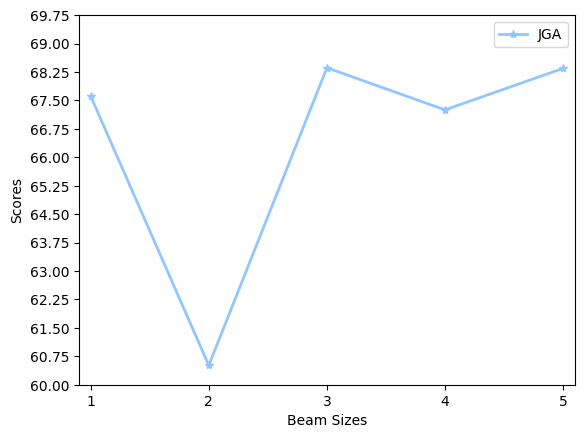

In [29]:
plt.style.use('seaborn-v0_8-pastel')

beam_sizes = np.array(range(1, 6))
metric_labels = ['F1', 'Meteor', 'JGA']
metric_labels = ['JGA']
#model_labels = ['flan T5', 'long T5 local', 'long T5 tglobal']
markers = ['o', '8', '*']
markers = ['*']
exp_array = [f1_tglobal[1:], meteor_tglobal[1:], jga_tglobal[1:]]
exp_array = [jga_tglobal[1:]]
#exp_array = [f1_flan, f1_local, f1_tglobal]
exp_1_vals = [num for values in exp_array for num in values]


y_min =  min(exp_1_vals)
y_max =  max(exp_1_vals)

# plot

 
fig, ax = plt.subplots()

def gen_lines(ax, beam_s, exp_array, labels, markers):
    handles = []
    for exp, l, m in zip(exp_array, labels, markers):        
        lines, = ax.plot(beam_s, exp, label=l, marker=m, linewidth=2.0)
        handles.append(lines)

        # for score in exp:
        #     ax.text(beam_sizes[1] + 0.2, score, f'{score:.2f}', va='center')


    
    return handles

handles = gen_lines(ax, beam_sizes, exp_array, metric_labels, markers)

ax.legend(handles=handles)



ax.set(xlim=(0.9, 5.1), xticks=[1, 2, 3, 4, 5],
       ylabel='Scores', xlabel='Beam Sizes',# title='Greedy Search vs. Beam Search',
       ylim=(y_min, y_max), yticks=np.arange(60, 70.50, .75))

plt.show()
fig.savefig("greedy_vs_beam")

In [30]:
f1_tglobal = [data[i]['tglobal']['f1'] for i in range(6)] 
f1_flan = [data[i]['flan']['f1'] for i in range(6)] 
f1_local = [data[i]['local']['f1'] for i in range(6)] 

jga_tglobal = [data[i]['tglobal']['fuzzy_jga'] for i in range(6)] 
jga_flan = [data[i]['flan']['fuzzy_jga'] for i in range(6)] 
jga_local = [data[i]['local']['fuzzy_jga'] for i in range(6)] 

meteor_tglobal = [data[i]['tglobal']['meteor'] for i in range(6)] 
meteor_flan = [data[i]['flan']['meteor'] for i in range(6)] 
meteor_local = [data[i]['local']['meteor'] for i in range(6)] 


In [41]:
def create_arrays_for_plot(exp_array, metric):
    exp_1_vals = [num for values in exp_array for num in values]
    y_min =  min(exp_1_vals)
    y_max =  max(exp_1_vals)

    beam_sizes = np.array(range(1, 6))
    model_labels = ['flan T5', 'long T5 local', 'long T5 tglobal']
    markers = ['o', '8', '*']
    plt.style.use('seaborn-v0_8-pastel')
    fig, ax = plt.subplots()   
    
    
    handles = gen_lines(ax, beam_sizes, exp_array, model_labels, markers)
    
    ax.legend(handles=handles)    
    
    
    ax.set(xlim=(0.9, 5.1), xticks=[1, 2, 3, 4, 5],
           ylabel=f'{metric} Scores', xlabel='Beam Sizes',# title='Greedy Search vs. Beam Search',
           #ylim=(y_min, y_max), yticks=np.arange(88, 91.3, 0.3))
           ylim=(y_min, y_max), yticks=np.arange(87.6, 91.2, .4))
    
    plt.show()
    fig.savefig(f"{metric}_model_generation".lower())
    
def gen_lines(ax, beam_s, exp_array, labels, markers):
    handles = []
    for exp, l, m in zip(exp_array, labels, markers):        
        #lines, = ax.plot(beam_s, exp, label=l, marker=m, linewidth=2.0)
        
        exp_mean = np.mean(exp)
        standard_dev = np.std(exp)
        std_error = stats.sem(exp)
        yerr = [std_error for i in exp]
        # if no caps, then remove caps and change elinewidth for linewidth as above
        error_bar_container = ax.errorbar(beam_s, exp, yerr=yerr, label=l, marker=m, capsize=2.5, elinewidth=2, capthick=2)        
        handles.append(error_bar_container)

    
    return handles

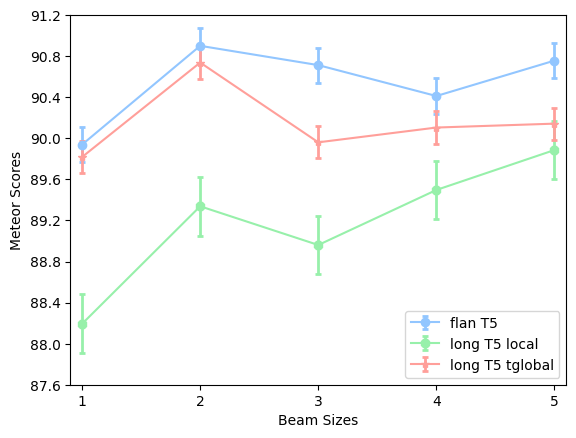

In [42]:
exp_array = [meteor_flan[1:], meteor_local[1:], meteor_tglobal[1:]]
#exp_array = [f1_flan[1:], f1_local[1:], f1_tglobal[1:]]
#exp_array = [jga_flan[1:], jga_local[1:], jga_tglobal[1:]]
create_arrays_for_plot(exp_array, 'Meteor')

# plot

 


# MultiWoz RDF Data

In [104]:
%%capturer
rdf_dataset = load_dataset("rdfdial", 'multiwoz')#, download_mode='force_redownload')
#print(rdf_dataset)
concat_rdf_dataset = concatenate_datasets([rdf_dataset['train'], rdf_dataset['validation'], rdf_dataset['test']])

In [105]:
rdf_dataset

DatasetDict({
    train: Dataset({
        features: ['dialogue_id', 'turns', 'states'],
        num_rows: 7673
    })
    test: Dataset({
        features: ['dialogue_id', 'turns', 'states'],
        num_rows: 384
    })
    validation: Dataset({
        features: ['dialogue_id', 'turns', 'states'],
        num_rows: 1535
    })
})

In [4]:
rdf_ids = set(concat_rdf_dataset['dialogue_id'])
train_val_rdf = concat_rdf_dataset.train_test_split(test_size=0.2)
test_val_rdf = train_val_rdf['test'].train_test_split(test_size=0.5)
rdf_dataset.update({'train': train_val_rdf['train'], 'validation': test_val_rdf['train'], 'test': test_val_rdf['test']})

In [5]:
print(rdf_dataset)

DatasetDict({
    train: Dataset({
        features: ['dialogue_id', 'turns', 'states'],
        num_rows: 7673
    })
    test: Dataset({
        features: ['dialogue_id', 'turns', 'states'],
        num_rows: 960
    })
    validation: Dataset({
        features: ['dialogue_id', 'turns', 'states'],
        num_rows: 959
    })
})


df_dataset.save_to_disk("multiwoz_rdf_data")<br>
aise SystemExit

# RDF data DSTC2

In [122]:
#non_rdf_dataset = load_dataset('dstc2')
#datasets.load_dataset("sfxdial","hotel")

dstc_dataset = load_dataset("rdfdial", 'dstc2')
dstc_dataset

Using the latest cached version of the module from /home/yddb9991/.cache/huggingface/modules/datasets_modules/datasets/rdfdial/3bcb471a1111dfce55b1169f3a32ded70d56f216bb1c50bda6a40f58c885852c (last modified on Fri Jul  7 16:33:28 2023) since it couldn't be found locally at rdfdial., or remotely on the Hugging Face Hub.
Found cached dataset rdfdial (/home/yddb9991/.cache/huggingface/datasets/rdfdial/dstc2/2.0.0/3bcb471a1111dfce55b1169f3a32ded70d56f216bb1c50bda6a40f58c885852c)


  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['dialogue_id', 'turns', 'states'],
        num_rows: 2118
    })
    test: Dataset({
        features: ['dialogue_id', 'turns', 'states'],
        num_rows: 424
    })
    validation: Dataset({
        features: ['dialogue_id', 'turns', 'states'],
        num_rows: 1694
    })
})

In [123]:
211800 / (2118 + 1694 + 424)

50.0

In [124]:
concat_dstc_dataset = concatenate_datasets([dstc_dataset['train'], dstc_dataset['validation'], dstc_dataset['test']])
concat_dstc_dataset

Dataset({
    features: ['dialogue_id', 'turns', 'states'],
    num_rows: 4236
})

In [125]:
train_val_dstc = concat_dstc_dataset.train_test_split(test_size=0.2)
test_val_dstc = train_val_dstc['test'].train_test_split(test_size=0.5)
dstc_dataset.update({'train': train_val_dstc['train'], 'validation': test_val_dstc['train'], 'test': test_val_dstc['test']})

In [126]:
dstc_dataset

DatasetDict({
    train: Dataset({
        features: ['dialogue_id', 'turns', 'states'],
        num_rows: 3388
    })
    test: Dataset({
        features: ['dialogue_id', 'turns', 'states'],
        num_rows: 424
    })
    validation: Dataset({
        features: ['dialogue_id', 'turns', 'states'],
        num_rows: 424
    })
})

In [127]:
3388 + 424 * 2
train_dstc = dstc_dataset['train']
test_dstc = dstc_dataset['test']
validation_dstc = dstc_dataset['validation']

def extract_turns(dstc_data):
    dialogues = []
    for i in range(len(dstc_data)):
        dialogues.append([x['speaker'] + ' ' + x['text'] for x in dstc_data[i]['turns']])
    return dialogues

In [128]:
validation_turns = extract_turns(validation_dstc)
test_turns = extract_turns(test_dstc)
train_turns = extract_turns(train_dstc)

In [129]:
val_len = [len(turn) // 2 for turn in validation_turns]
test_len = [len(turn) // 2 for turn in test_turns]
train_len = [len(turn) // 2 for turn in train_turns]

In [130]:
np.mean(test_len + val_len + train_len)

7.370632672332389

In [131]:
# Create a histogram trace for each set of values
trace1 = go.Histogram(x=val_len + test_len + train_len, opacity=0.77, name='sentences')
# trace2 = go.Histogram(x=test_len, opacity=0.77, name='Test')
# trace3 = go.Histogram(x=train_len, opacity=0.77, name='Train')

# Create a layout
layout = go.Layout(
    title='Distribution of Values',
    xaxis=dict(title='Sentence length'),
    yaxis=dict(title='Amount of sentences'),
    barmode='group'
)

# Create a figure and add the histogram traces
fig = go.Figure(data=[trace1], layout=layout)

# Show the figure
fig.show()

In [132]:
val_filter = list(filter(lambda turn: turn < 16, val_len))
test_filter = list(filter(lambda turn: turn < 16, test_len))
train_filter = list(filter(lambda turn: turn < 16, train_len))

In [133]:
# Create a histogram trace for each set of values
trace1 = go.Histogram(x=val_filter, opacity=0.50, name='Validation')
trace2 = go.Histogram(x=test_filter, opacity=0.50, name='Test')
trace3 = go.Histogram(x=train_filter, opacity=0.50, name='Train')

mean1, std1 = np.mean(val_filter), np.std(val_filter)
mean2, std2 = np.mean(test_filter), np.std(test_filter)

mean3, std3 = np.mean(train_filter), np.std(train_filter)

x = np.linspace(min(val_filter + test_filter + train_filter), max(val_filter + test_filter + train_filter), 100)

# Generate y values for the bell curve based on the mean and standard deviation
y1 = norm.pdf(x, mean1, std1) * len(val_filter)
y2 = norm.pdf(x, mean2, std2) * len(test_filter)
y3 = norm.pdf(x, mean3, std3) * len(val_filter)  # changed scalable value for the val set instead of train

# Create scatter traces for the bell curves
curve1 = go.Scatter(x=x, y=y1, mode='markers', opacity=0.99, name='Val. distribution')
curve2 = go.Scatter(x=x, y=y2, mode='markers', opacity=0.99, name='Test distribution')
curve3 = go.Scatter(x=x, y=y3, mode='markers', opacity=0.99, name='Train distribution')


# Create a layout
layout = go.Layout(
    #title='Distribution of Values',
    xaxis=dict(title='Sentence length'),
    yaxis=dict(title='Amount of sentences'),
    barmode='group', showlegend=False
)

# Create a figure and add the histogram traces
fig = go.Figure(data=[trace1, trace2, curve1, curve2], layout=layout)
#fig = go.Figure(data=[trace1, trace2], layout=layout)

# Show the figure
fig.show()
fig.write_image("dst_sentence_len.png", engine="kaleido")

# Original non-RDF data SFX

In [94]:
sfx_dataset = load_dataset("rdfdial", 'sfxdial')


Using the latest cached version of the module from /home/yddb9991/.cache/huggingface/modules/datasets_modules/datasets/rdfdial/3bcb471a1111dfce55b1169f3a32ded70d56f216bb1c50bda6a40f58c885852c (last modified on Fri Jul  7 16:33:28 2023) since it couldn't be found locally at rdfdial., or remotely on the Hugging Face Hub.
Found cached dataset rdfdial (/home/yddb9991/.cache/huggingface/datasets/rdfdial/sfxdial/2.0.0/3bcb471a1111dfce55b1169f3a32ded70d56f216bb1c50bda6a40f58c885852c)


  0%|          | 0/3 [00:00<?, ?it/s]

In [134]:
sfx_dataset

DatasetDict({
    train: Dataset({
        features: ['dialogue_id', 'turns', 'states'],
        num_rows: 1613
    })
    test: Dataset({
        features: ['dialogue_id', 'turns', 'states'],
        num_rows: 202
    })
    validation: Dataset({
        features: ['dialogue_id', 'turns', 'states'],
        num_rows: 202
    })
})

In [135]:
1613 + 81 + 323
concat_sfx_dataset = concatenate_datasets([sfx_dataset['train'], sfx_dataset['validation'], sfx_dataset['test']])
concat_sfx_dataset

Dataset({
    features: ['dialogue_id', 'turns', 'states'],
    num_rows: 2017
})

In [136]:
8100/ 2017 

4.015865146256817

In [137]:
train_val_sfx = concat_sfx_dataset.train_test_split(test_size=0.2)
test_val_sfx = train_val_sfx['test'].train_test_split(test_size=0.5)
sfx_dataset.update({'train': train_val_sfx['train'], 'validation': test_val_sfx['train'], 'test': test_val_sfx['test']})

In [138]:
sfx_dataset

DatasetDict({
    train: Dataset({
        features: ['dialogue_id', 'turns', 'states'],
        num_rows: 1613
    })
    test: Dataset({
        features: ['dialogue_id', 'turns', 'states'],
        num_rows: 202
    })
    validation: Dataset({
        features: ['dialogue_id', 'turns', 'states'],
        num_rows: 202
    })
})

In [139]:
train_sfx = sfx_dataset['train']
test_sfx = sfx_dataset['test']
validation_sfx = sfx_dataset['validation']

def extract_turns(sfx_data):
    dialogues = []
    for i in range(len(sfx_data)):
        dialogues.append([x['speaker'] + ' ' + x['text'] for x in sfx_data[i]['turns']])
    return dialogues

In [140]:
validation_sfx_turns = extract_turns(validation_sfx)
test_sfx_turns = extract_turns(test_sfx)
train_sfx_turns = extract_turns(train_sfx)


In [141]:
val_sfx_len = [len(turn) // 2 for turn in validation_sfx_turns]
test_sfx_len = [len(turn) // 2 for turn in test_sfx_turns]
train_sfx_len = [len(turn) // 2 for turn in train_sfx_turns]

In [142]:
np.mean(val_sfx_len + test_sfx_len + train_sfx_len)

6.237977193852256

In [145]:
train_sfx[5]['states']

[{'id': 0,
  'multi_relations': False,
  'triples': [['_:system', 'greeted', '_:user'],
   ['_:search', 'pricerange', 'moderate'],
   ['_:search', 'type', 'Restaurant']],
  'turn_ids': [0]},
 {'id': 1,
  'multi_relations': False,
  'triples': [['_:system', 'greeted', '_:user'],
   ['_:search', 'pricerange', 'moderate'],
   ['_:result', 'name', 'colibri mexican bistro'],
   ['_:result', 'pricerange', 'moderate'],
   ['_:result', 'type', 'Restaurant'],
   ['_:search', 'near', 'potrero hill'],
   ['_:search', 'type', 'Restaurant']],
  'turn_ids': [0, 1, 2]},
 {'id': 2,
  'multi_relations': False,
  'triples': [['_:system', 'greeted', '_:user'],
   ['_:search', 'pricerange', 'moderate'],
   ['_:search', 'near', 'potrero hill'],
   ['_:result', 'name', 'aperto restaurant'],
   ['_:result', 'near', 'potrero hill'],
   ['_:result', 'pricerange', 'moderate'],
   ['_:result', 'type', 'Restaurant'],
   ['_:search', 'good_for_meal', 'dinner'],
   ['_:search', 'type', 'Restaurant']],
  'turn_ids':

# Original non-RDF data MULTIWOZ

In [6]:
%%capture
non_rdf_dataset = load_dataset('multiwoz-convlab2', 'v2.3')#, download_mode='force_redownload')

In [7]:
non_rdf_dataset

DatasetDict({
    train: Dataset({
        features: ['dialogue_id', 'turns'],
        num_rows: 10438
    })
})

In [8]:

dialogue_topics = {}
dialogues = {}
diag_df = {}
for e, t in enumerate(non_rdf_dataset['train']):
    dialogue = t['turns']

    user_domains = set()
    sys_domains = set()
    diag = ''
    for i in range(len(dialogue)):
        user = dialogue[i]['user']
        system = dialogue[i]['system']
        diag += user['text'] + '\n' + system['text']
        #print(user['dialog-acts'])
    
        # print(system['dialog-acts'])
        user_acts = set(diag_act['act'].split('-')[0] for diag_act in user['dialog-acts'])
        system_acts = set(diag_act['act'].split('-')[0] for diag_act in system['dialog-acts'])
  
        user_domains |= user_acts
        sys_domains |= system_acts

    diag_domains = sorted(filter(lambda dom: dom != 'general', user_domains | sys_domains), key=lambda x: x.lower())
    #sorted(diag_domains,)
    dialogue_topics[e] = diag_domains
    dialogues[e] = diag
    diag_df[e] = {'dialogue': diag, 'domains': ', '.join(diag_domains), 'num_domains': len(diag_domains)}

dialogues = sorted(dialogues.items(), key=lambda x: x[0])
dialogues = [diag[1] for diag in dialogues]
diag_df = pd.DataFrame.from_dict(diag_df).T

In [9]:
diag_df

,dialogue,domains,num_domains
0,am looking for a place to to stay that has che...,"Booking, Hotel",2
1,"Hello , I have been robbed . Can you please ...",Police,1
2,"Hi , I 'm looking for a train that is going to...","Booking, Hotel, Train",3
3,I was robbed a few minutes ago and need assist...,Police,1
4,Hi . I 'm looking for a hotel in the east . ...,"Booking, Hotel, Train",3
...,...,...,...
10433,"Hi , I am looking for a high - end Cuban resta...","Attraction, Restaurant",2
10434,"Hello , I need help finding a moderate priced ...","Attraction, Booking, Restaurant, Taxi",4
10435,i am looking for a place to stay . The hotel s...,"Attraction, Booking, Hotel, Taxi",4
10436,I need a place to stay in the north that has f...,"Booking, Hotel, Restaurant",3


In [10]:
unique_diag_domains = {}
diag_by_amount_topic = {}
diag_by_topic = {}
for diag in dialogue_topics:
    raw_topic = dialogue_topics[diag]

    num_topics = len(raw_topic)
    topic = '-'.join(raw_topic)
    for t in raw_topic:
        if t not in diag_by_topic:
            diag_by_topic[t] = 1
        elif t in diag_by_topic:
            diag_by_topic[t] += 1
        
    if topic not in unique_diag_domains:
        unique_diag_domains[topic] = 1
    elif topic in unique_diag_domains:
        unique_diag_domains[topic] += 1
        
    if num_topics not in diag_by_amount_topic:
        diag_by_amount_topic[num_topics] = 1
    elif num_topics in diag_by_amount_topic:
        diag_by_amount_topic[num_topics] += 1

In [11]:
unique_diag_domains
inverse_unique = {v: k.split('-') for k, v in unique_diag_domains.items()}
diag_by_topic

{'Booking': 6354,
 'Hotel': 4258,
 'Police': 261,
 'Train': 3980,
 'Attraction': 3520,
 'Restaurant': 4786,
 'Hospital': 298,
 'Taxi': 1897}

In [19]:
import plotly.graph_objects as go

inverse_unique
diag_viz = {"Domains": list(diag_by_topic.keys()), "Dialogues": list(diag_by_topic.values())}
fig = px.bar(diag_viz, x='Domains', y='Dialogues', title="Number of overlapping dialogues across domains")


colors = ['lightslategray',] * 5
colors = [
    '#2ca02c',  # cooked asparagus green
    '#ff7f0e',  # safety orange
    '#1f77b4',  # muted blue 
    '#d62728',  # brick red
    '#9467bd',  # muted purple
    '#8c564b',  # chestnut brown
    '#e377c2',  # raspberry yogurt pink
    '#7f7f7f',  # middle gray
]
#colors[1] = 'crimson'

fig = go.Figure(data=[go.Bar(
    x=diag_viz['Domains'],
    y=diag_viz['Dialogues'],
    marker_color=colors # marker color can be a single color value or an iterable
)])

fig.update_layout(#title_text='Number of overlapping dialogues across domains',
                  yaxis=dict(
        title='Dialogues',
        titlefont_size=16,
        tickfont_size=14,
    ),
                   xaxis=dict(
        title='Domains',
        titlefont_size=16,
        tickfont_size=14,
    ),
    width=640,
    height=640       
                 )

fig.show()
fig.write_image("diag_domains.png", engine="kaleido")

In [13]:
unique_diag_domains
diag_by_amount_topic

total_sum = sum(diag_by_amount_topic.values())
domain_percentages = [round((value / total_sum) * 100, 2) for value in diag_by_amount_topic.values()]

dict_to_viz = {'Number of Domains': list(diag_by_amount_topic.keys()), 'Number of Dialogues': domain_percentages}
df = pd.DataFrame.from_dict(dict_to_viz)
df

,Number of Domains,Number of Dialogues
0,2,27.83
1,1,21.85
2,3,36.58
3,4,13.04
4,5,0.70


In [20]:
colors = [
    '#1f77b4',  # muted blue
    '#ff7f0e',  # safety orange
    '#2ca02c',  # cooked asparagus green
    '#9467bd',  # muted purple

    '#e377c2',  # raspberry yogurt pink

]

fig = go.Figure(data=[go.Bar(
    x=dict_to_viz['Number of Domains'],
    y=dict_to_viz['Number of Dialogues'],
    text=dict_to_viz['Number of Dialogues'],
    width=[0.7] * 5 
    #marker_color=colors # marker color can be a single color value or an iterable
)])

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')

fig.update_layout(#title_text='How many dialogues are multi-domain?',
        yaxis=dict(
        title='Percentage of Dialogues',
        titlefont_size=16,
        tickfont_size=14,
    ),
                   xaxis=dict(
        title='Number of Domains',
        titlefont_size=16,
        tickfont_size=14,
    ),
    width=500,
    height=500           
                 )

fig.write_image("percentage_dialogues.png", engine="kaleido")
fig.show()




# fig = px.bar(dict_to_viz, x='Number of Domains', y='Number of Dialogues')
# fig.show()

# Some attempt at topic modeling

In [15]:
# Sample documents
documents = [
    "I love to play sports and watch football.",
    "The environment is a key concern for our planet.",
    "Technology advancements are shaping our future.",
    "Healthcare policies need to be improved.",
    "Business strategies for success in the digital era."
]

documents = dialogues

# Preprocess the text
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

tokenized_docs = [word_tokenize(doc.lower()) for doc in documents]
filtered_docs = [[lemmatizer.lemmatize(token) for token in doc if token.isalnum() and token not in stop_words]
                 for doc in tokenized_docs]

# Create a dictionary from the preprocessed documents
dictionary = corpora.Dictionary(filtered_docs)

# Create a document-term matrix
doc_term_matrix = [dictionary.doc2bow(doc) for doc in filtered_docs]

# Build the LDA model
num_topics = 8
lda_model = models.LdaModel(doc_term_matrix, num_topics=num_topics, id2word=dictionary, passes=10)

# Define topic labels
topic_labels = list(diag_by_topic.keys())#["Sports", "Environment"]

# Assign topics to documents
diag_topic_distribution = {}
for i in range(len(documents)):
    bow = dictionary.doc2bow(filtered_docs[i])
    topics = lda_model.get_document_topics(bow)
    topic_distributions = {topic_labels[topic[0]]: topic[1] for topic in topics}
    diag_topic_distribution[i] = topic_distributions
    #print("Document {}: Topic Distribution: {}".format(i, topic_distributions))


In [16]:
print(diag_topic_distribution[69])
print(dialogue_topics[69])

diag_df['dialogue'].iloc[69]

{'Attraction': 0.41149768, 'Hospital': 0.5784902}
['Attraction', 'Train']


"I am going out of town from Cambridge on tuesday and need to take a train , can you help me ?\nAbsolutely . Where are you heading to ?I am going to ely\nOk , did you have a certain time you wanted to leave after or arrive in Ely ?I would like to leave after 19:15 please .\nfor how many ?for 2 people , please\nBooking was successful ,   .Reference number is : G02V81W6 . The train ID is TR5511 , it leaves at 19:50I 'm also looking for a college in the west . Can you recommend one ?\nThere are 5 . 3 are free , and 2 cost 2.50 Pounds to visit . What do you prefer ?How about one of the free ones ? Give me the address and phone number .\nChurchill College is located on Storey 's Way . The phone number is 01223336233 . Is there anything else I can do for you today ?No , I think that is everything I can think of .   Thanks for your help !\nThank you enjoy the rest of your day ."

In [17]:
def explore(, batch):
        
    input_ids = []
    attention_mask = []
    labels = []
    dialogue_ids = []
    turn_number = []


    for diag_id, dialogue_data in zip(batch['dialogue_id'], batch['turns']):  # dict, history is a str that is the key
        txt_input, slot_value, turn_ids = self.create_inputs_outputs(dialogue_data)

        turn_number.extend(turn_ids)
        dialogue_ids.extend([diag_id] * len(turn_ids))
        for txt, s_v in zip(txt_input, slot_value):
            tokenized = self.tokenize(txt, s_v)

            input_ids.append(tokenized['input_ids'])
            attention_mask.append(tokenized['attention_mask'])
            labels.append(tokenized['labels'])


    return {'input_ids': input_ids, 'attention_mask': attention_mask,
            'labels': labels, 'dialogue_id': dialogue_ids, 'turn_number': turn_number}

SyntaxError: invalid syntax (3927913604.py, line 1)